In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '.\\archive\\kagglecatsanddogs_3367a\\PetImages',
    labels='inferred',
    label_mode = 'int',
    batch_size=320,
    image_size=(150,150)
)

Found 24959 files belonging to 2 classes.


In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
#genraotor
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '.\\archive\\kagglecatsanddogs_3367a\\PetImages',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

Found 24959 images belonging to 2 classes.


In [11]:
# Define the input shape
input_shape = (150, 150, 3)  # Assuming images are 150x150 pixels with 3 color channels (RGB)

# Create the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

# Print the model summary
# model.summary()


In [12]:
# for image,label in df:
#     print(image,df)
#     break

In [15]:
model.fit(train_generator,epochs=10,)

Epoch 1/10
452/780 [================>.............] - ETA: 1:16 - loss: 0.6806 - accuracy: 0.6282

c:\Users\mshar\.conda\envs\gpupy310\lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


780/780 [==============================] - 196s 237ms/step - loss: 0.6419 - accuracy: 0.6539
Epoch 2/10
780/780 [==============================] - 215s 275ms/step - loss: 0.5023 - accuracy: 0.7548
Epoch 3/10
780/780 [==============================] - 203s 260ms/step - loss: 0.4517 - accuracy: 0.7858
Epoch 4/10
566/780 [====================>.........] - ETA: 1:12 - loss: 0.4197 - accuracy: 0.8042

KeyboardInterrupt: 

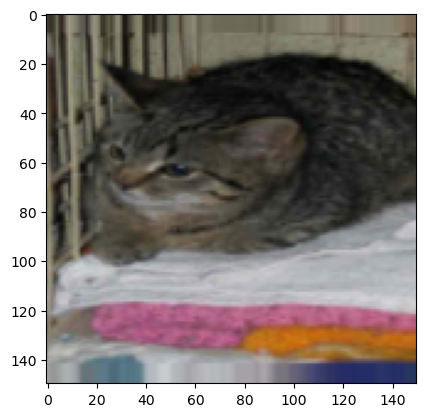

In [16]:
a=next(train_generator)[0][0]
b=a.reshape(1,150,150,3)
plt.imshow(a)

In [ ]:
if(model.predict(b)[0]>0.5):
    print("dog",model.predict(b)[0])
else:
    print("cat",model.predict(b)[0])

1/1 [==============================] - 0s 17ms/step
cat [0.0328606]


In [17]:
model.save("cat_dog.h5")